## 1. Importing Necessary Libraries

In [87]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import itertools
from itertools import chain
from sklearn.metrics import confusion_matrix

## 2. Importing Dataset

In [52]:
data = pd.read_csv(r'dataset_breast_cancer.csv')

# show the data of how many rows and columns
print("Data Shape - ", data.shape)

Data Shape -  (569, 33)


# 3. Read the Data

In [53]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
# description of the current data set
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


From the first look in the data description we can see that :
    - B = benign is the most frequent value in our target columns
    - Unnamed: 32nd columns is an empty column

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

According to the data, all features are numerical values except the target value diagnosis which is an object: M = malignant, B = benign.

# 4. EDA (Exploratory Data Analysis)

As the 32nd colum is empty, we will drop it out.

In [56]:
df = data.drop('Unnamed: 32',axis=1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
id,0,0.0
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0


From the tables, it shows that the data is cleaned and no missing value.

In [58]:
# transformation of type of the target value to numerical
le = preprocessing.LabelEncoder()
df.diagnosis = le.fit_transform(df.diagnosis)
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

Diagnosis:

M = malignant => 1
B = benign => 0

Let's also drop out an id column

In [59]:
# drop the id columns
df_new = df.drop('id',axis=1)

#### Correlation Matrix with Heatmap

A graphical representation of a correlation matrix representing the correlation between different variables. The value of correlation can take any value
from -1 to 1.

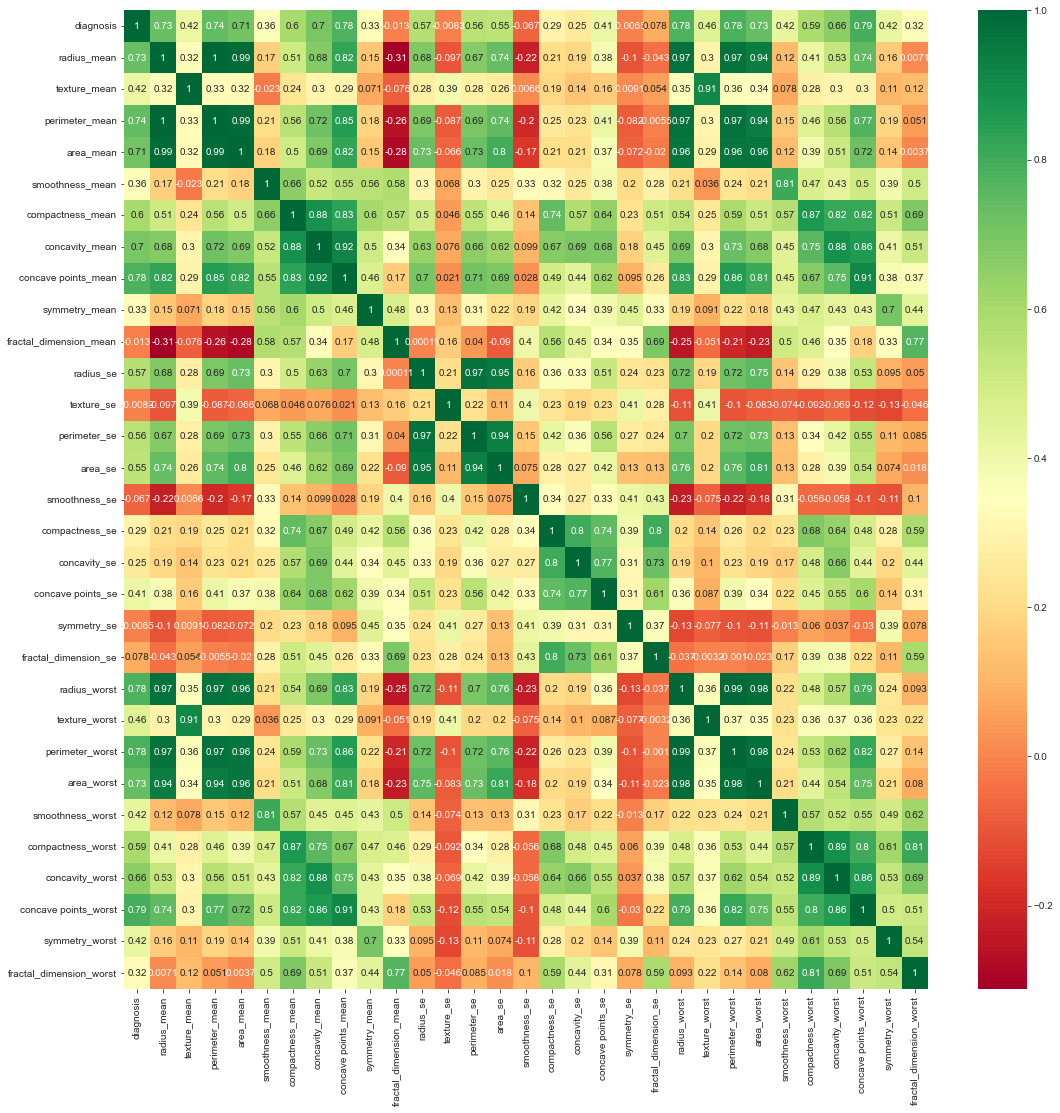

In [60]:
#independent columns
X = df_new.iloc[:, 0:20]
#target column
y = df_new.iloc[:, -1]

#get correlations of each features in dataset
corrmatrix = df_new.corr()
top_corr_features = corrmatrix.index
plt.figure(figsize=(18, 18))

#plot heat map
g = sns.heatmap(df_new[top_corr_features].corr(), annot=True, cmap="RdYlGn")

From the above correlation heatmap, we could get some of the following information:

- Variables such as radius_worst & radious_mean, radius_worst & parameter_mean, are having strong positive correlation, just to name a few.
- Variables such as radius_worst & smoothness_se, and fractal_dimension_mean & radious_mean are having strong negative correlations: also, just to name a few.
- overall, to view this correlation graph: there are several variables that have no correlation and whose correlation value is near 0, while whose that have strong correlation is closer to 1.

# 4. Feature Engineering

### 4.1 Univariate Selection using SelectKBest

Select features according to the k-highest scores.

In [61]:
#independent columns
X = df_new.iloc[:, 0:32]
#target column
y = df_new.iloc[:, -1]

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featurescores = pd.concat([dfcolumns, dfscores], axis=1)
#naming the dataframe columns
featurescores.columns = ['Specs', 'Score']
#print 15 best features
print(featurescores.nlargest(15, 'Score'))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\languages\python\python390\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alici\AppData\Local\Temp\ipykernel_18488\350711347.py", line 8, in <cell line: 8>
    fit = bestfeatures.fit(X, y)
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_univariate_selection.py", line 353, in fit
    score_func_ret = self.score_func(X, y)
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_univariate_selection.py", line 220, in chi2
    Y = LabelBinarizer().fit_transform(y)
  File "c:\languages\python\python390\lib\site-packages\sklearn\preprocessing\_label.py", line 321, in fit_transform
    return self.fit(y).transform(y)
  File "c:\languages\python\python390\lib\site-packages\sklearn\preprocessing\_label.py", line 297, in fit
    self.classes_ = unique_labels(y)
  File "c:\languages\python\py

### 4.2 Feature Selection

[0.04974759 0.01744781 0.04272827 0.05503638 0.01033933 0.02802658
 0.04632625 0.05365184 0.00835636 0.00782829 0.02000221 0.00539011
 0.02138492 0.02514362 0.00637013 0.00764824 0.00661933 0.00697602
 0.00665462 0.00577763 0.11287022 0.0289453  0.10641407 0.07315128
 0.02173829 0.02789244 0.0672289  0.10425882 0.0144858  0.01155938]


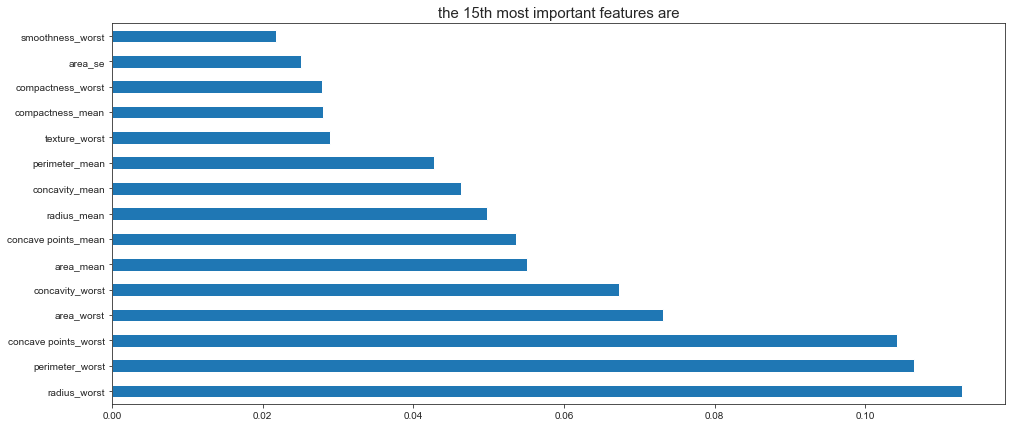

In [62]:
plt.rcParams['figure.figsize']=16,7
sns.set_style("ticks")

x = df_new.drop('diagnosis',axis=1)
y = df_new.diagnosis

model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=x.columns)

feat_importance.nlargest(15).plot(kind='barh', fontsize=10)
plt.title('the 15th most important features are', fontsize=15)
plt.show()

Let's check our current column name.

In [63]:
df_new.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Drop out unimportant features, and choose just the best 15 according the bar chart.

In [64]:
data_new=df_new.drop(['texture_mean','smoothness_mean','compactness_mean','symmetry_mean','perimeter_se','compactness_se','concavity_se','concave points_se','smoothness_worst','symmetry_worst','fractal_dimension_worst', 'fractal_dimension_mean','texture_se','smoothness_se','symmetry_se','fractal_dimension_se'],axis=1)

# 5. Data Vizualisation

### 5.1 Plotting Distributions

### 5.2 Diagnosis

Text(0.5, 1.0, 'Number of diagnosis ')

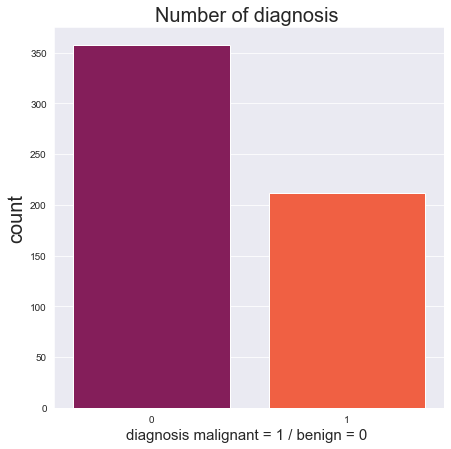

In [67]:
plt.rcParams['figure.figsize']=7,7
sns.set_style("darkgrid")
ax = sns.countplot(x=data_new.diagnosis , palette = "rocket", saturation =1.5)
plt.xlabel("diagnosis malignant = 1 / benign = 0 ", fontsize = 15 )
plt.ylabel("count", fontsize = 20)
plt.title('Number of diagnosis ', fontsize = 20)

Ploting the histogram of these values so we can better observer their values and data distribution. In order to do so, we are going to separate, for each histogram, the values depending on the diagnosis column.

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\languages\python\python390\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alici\AppData\Local\Temp\ipykernel_18488\3023578253.py", line 17, in <cell line: 15>
    graph.hist([malignant[flistt[i]],benign[flistt[i]]], bins=30, normed = True, alpha=0.6, label=['Malignant','Benign'], color=['r','g'])
  File "c:\languages\python\python390\lib\site-packages\matplotlib\__init__.py", line 1412, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\languages\python\python390\lib\site-packages\matplotlib\axes\_axes.py", line 6552, in hist
    x = cbook._reshape_2D(x, 'x')
  File "c:\languages\python\python390\lib\site-packages\matplotlib\cbook\__init__.py", line 1398, in _reshape_2D
    raise ValueError(f'{name} must have 2 or fewer dimensions')
ValueError: x must have 2 or fewer dimensions

During handling of the above excep

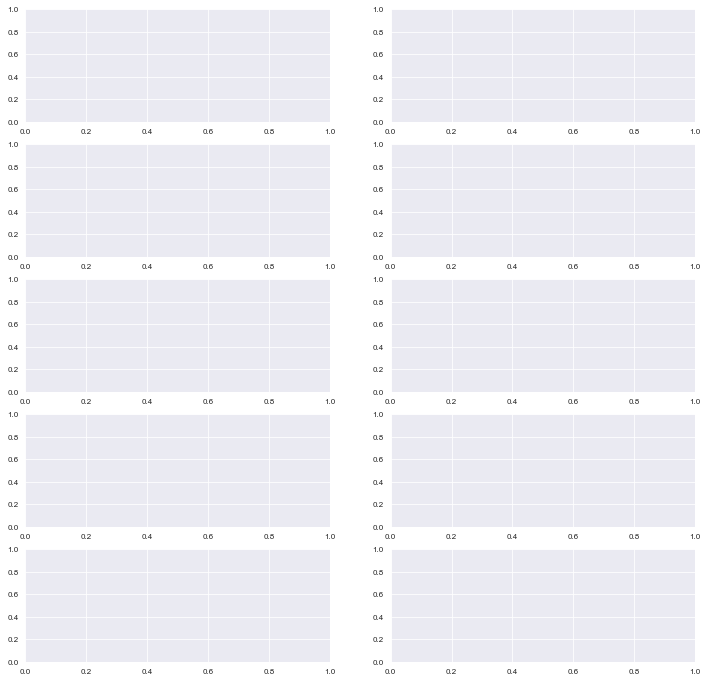

In [73]:
#Here we are going to plot the histograms of the features we selected before and the most frequent malignant tumour value
flistt = ['diagnosis', 'radius_mean', 'perimeter_mean',
       'area_mean','concavity_mean',
       'concave points_mean',
       'radius_se', 'area_se',
        'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],

malignant = data_new[data_new['diagnosis'] ==1]
benign = data_new[data_new['diagnosis'] == 0]
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 5, ncols= 2, figsize=(12,12))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    graph.hist([malignant[flistt[i]],benign[flistt[i]]], bins=30, normed = True, alpha=0.6, label=['Malignant','Benign'], color=['r','g'])
    graph.legend(loc='upper right')
    graph.set_xlabel("Most frequent malignant value is " + str([malignant[flistt[i]].value_counts().idxmax()]))
    graph.set_title(flistt[i])
plt.tight_layout()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\languages\python\python390\lib\site-packages\pandas\core\indexes\base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'texture_mean'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\languages\python\python390\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alici\AppData\Local\Temp\ipykernel_18488\1204454302.py", line 12, in <cell line: 10>
    binwidth= (

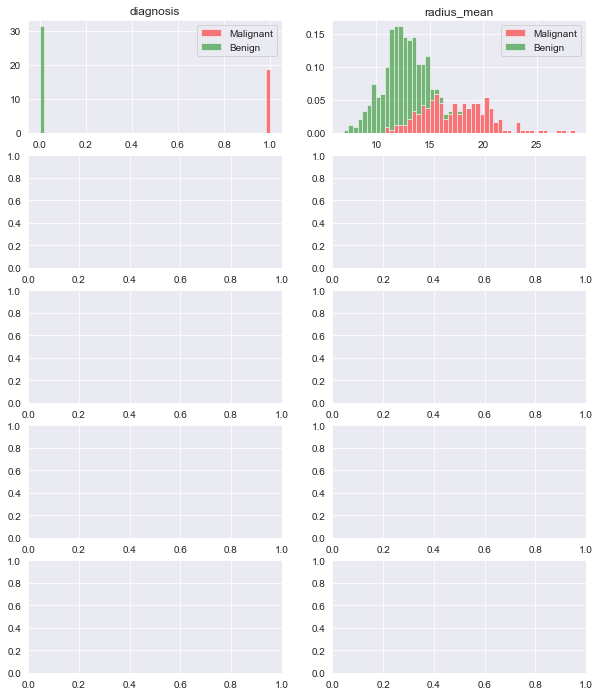

In [86]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data_new[data_new['diagnosis'] ==1]
dfB=data_new[data_new['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,12))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data_new[features_mean[idx]]) - min(data_new[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data_new[features_mean[idx]]), max(data_new[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['Malignant','Benign'], color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

From these ten graphs we can observe, these features might be useful in predicting whether a patient has cancer or not due to the distinct grouping between malignant and benign. We can also see the most frequent malignant value of these features under each graph, although visually they may vary since we might not have an optimal bin width, bust most of them match with the values histograms show.

## 5.3 Automatically Selected Features

 Recursive feature elimination with cross validation  and random forest in order to check how many of these features we do really need in order to have the optimal accuracy in our model. In order to do so, we will use our original data with all features and we're going to split the data.

In [88]:
yrf = df_new.iloc[:,1]
xrf = df_new.iloc[:,2:31]
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(xrf, yrf, test_size=0.3, random_state=42)

In [89]:
random_forest = RandomForestClassifier()
rfecv = RFECV(estimator=random_forest, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(xrf_train, yrf_train)
print('Total features selected:', rfecv.n_features_)
print('Selected features:', xrf_train.columns[rfecv.support_])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\languages\python\python390\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\alici\AppData\Local\Temp\ipykernel_18488\2468443340.py", line 3, in <cell line: 3>
    rfecv = rfecv.fit(xrf_train, yrf_train)
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_rfe.py", line 605, in fit
    scores = parallel(
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_rfe.py", line 606, in <genexpr>
    func(rfe, self.estimator, X, y, train, test, scorer)
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_rfe.py", line 37, in _rfe_single_fit
    return rfe._fit(
  File "c:\languages\python\python390\lib\site-packages\sklearn\feature_selection\_rfe.py", line 241, in _fit
    estimator.fit(X[:, features], y)
  File "c:\languages\python\python390\lib\site-packages\sklea

# 6. Prepare Dataset

# 7. Define Functions

This part is essential to measure the performance of a model : roc, cross validation, learning curve.

## 6.1. Confusion Matrix and Show Metrics

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

true positive (TP) : Malignant tumour correctly identified as malignant
true negative (TN) : Benign tumour correctly identified as benign
false positive (FP) : Benign tumour incorrectly identified as malignant
false negative (FN) : Malignant tumour incorrectly identified as benign

Metrics :

Accuracy : (TP +TN) / (TP + TN + FP +FN)
Precision : TP / (TP + FP)
Recall : TP / (TP + FN)

In [ ]:
# Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:


# Show metrics
cm = confusion_matrix(y_test, y_score)

def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

# 8. Machine Learning Applications

# 9. Displaying Best Model